# 🤖 Exploratory data analysis (EDA)

### Authors:
| Name                          | Github user                                        |
|-------------------------------|----------------------------------------------------|
| Sergio Herreros Fernández     | [@SergioHerreros](https://github.com/SERGI0HERREROS)|
| Francisco Javier Luna Ortiz   | [@Lunao01](https://github.com/Lunao01)|
| Carlos Romero Navarro         | [@KarManiatic](https://github.com/KarManiatic)|
| Tatsiana Shelepen             | [@Naschkatzee](https://github.com/Naschkatzee) | 

<br>

## 1. Introduction

### 1.1. Problem description

The goal of this project is to predict the probability that people receive two types of vaccines:
- H1N1 flu vaccine.
- Seasonal flu vaccine.

All the information is on the following site:<br>
https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

<br>

### 1.2. Labels

There are two target variables:
- **h1n1_vaccine** - Whether respondent received H1N1 flu vaccine.
- **seasonal_vaccine** - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes.

<br>

### 1.3. Features

List of features:

- **h1n1_concern** - Level of concern about the H1N1 flu.
    - 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

- **h1n1_knowledge** - Level of knowledge about H1N1 flu.
    - 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

- **behavioral_antiviral_meds** - Has taken antiviral medications. (binary)

- **behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)

- **behavioral_face_mask** - Has bought a face mask. (binary)

- **behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)

- **behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)

- **behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)

- **behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)

- **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)

- **doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)

- **chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

- **child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)

- **health_worker** - Is a healthcare worker. (binary)

- **health_insurance** - Has health insurance. (binary)

- **opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
    - 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

- **opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
    - 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

- **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
    - 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

- **opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
    - 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

- **opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
    - 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
    
- **opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
    - 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

- **age_group** - Age group of respondent.

- **education** - Self-reported education level.

- **race** - Race of respondent.

- **sex** - Sex of respondent.

- **income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.

- **marital_status** - Marital status of respondent.

- **rent_or_own** - Housing situation of respondent.

- **employment_status** - Employment status of respondent.

- **hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

- **census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

- **household_adults** - Number of other adults in household, top-coded to 3.

- **household_children** - Number of children in household, top-coded to 3.

- **employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.

- **employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.

**Note:** For all binary variables: 0 = No; 1 = Yes.

<br>

## 2. Data

The datasets that will be used throughout the project are imported.

In [491]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data
training_set_features_df = pd.read_csv('data/training_set_features.csv') # training set features

training_set_labels_df = pd.read_csv('data/training_set_labels.csv') # training set labels

test_set_features_df = pd.read_csv('data/test_set_features.csv') # test set features

<br>

## 3. Exploratory data analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in the data analysis process, where various techniques are used to summarize the main characteristics of a dataset, often through visualizations and statistical analysis. EDA helps to identify patterns, trends, and anomalies in the data, as well as to uncover relationships between variables. This phase is essential for understanding the data and making informed decisions about how to preprocess and model it.

### 3.1. Training set features

Features.

In [492]:
training_set_features_df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

Data types.

In [493]:
training_set_features_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

Overview of the features.

In [494]:
training_set_features_df.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


There are a total of 26707 rows and 36 columns.

In [495]:
training_set_features_df.shape

(26707, 36)

Mean, maximum, minimum, standard deviation and percentiles of each feature.

In [496]:
training_set_features_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


Distribution plots.

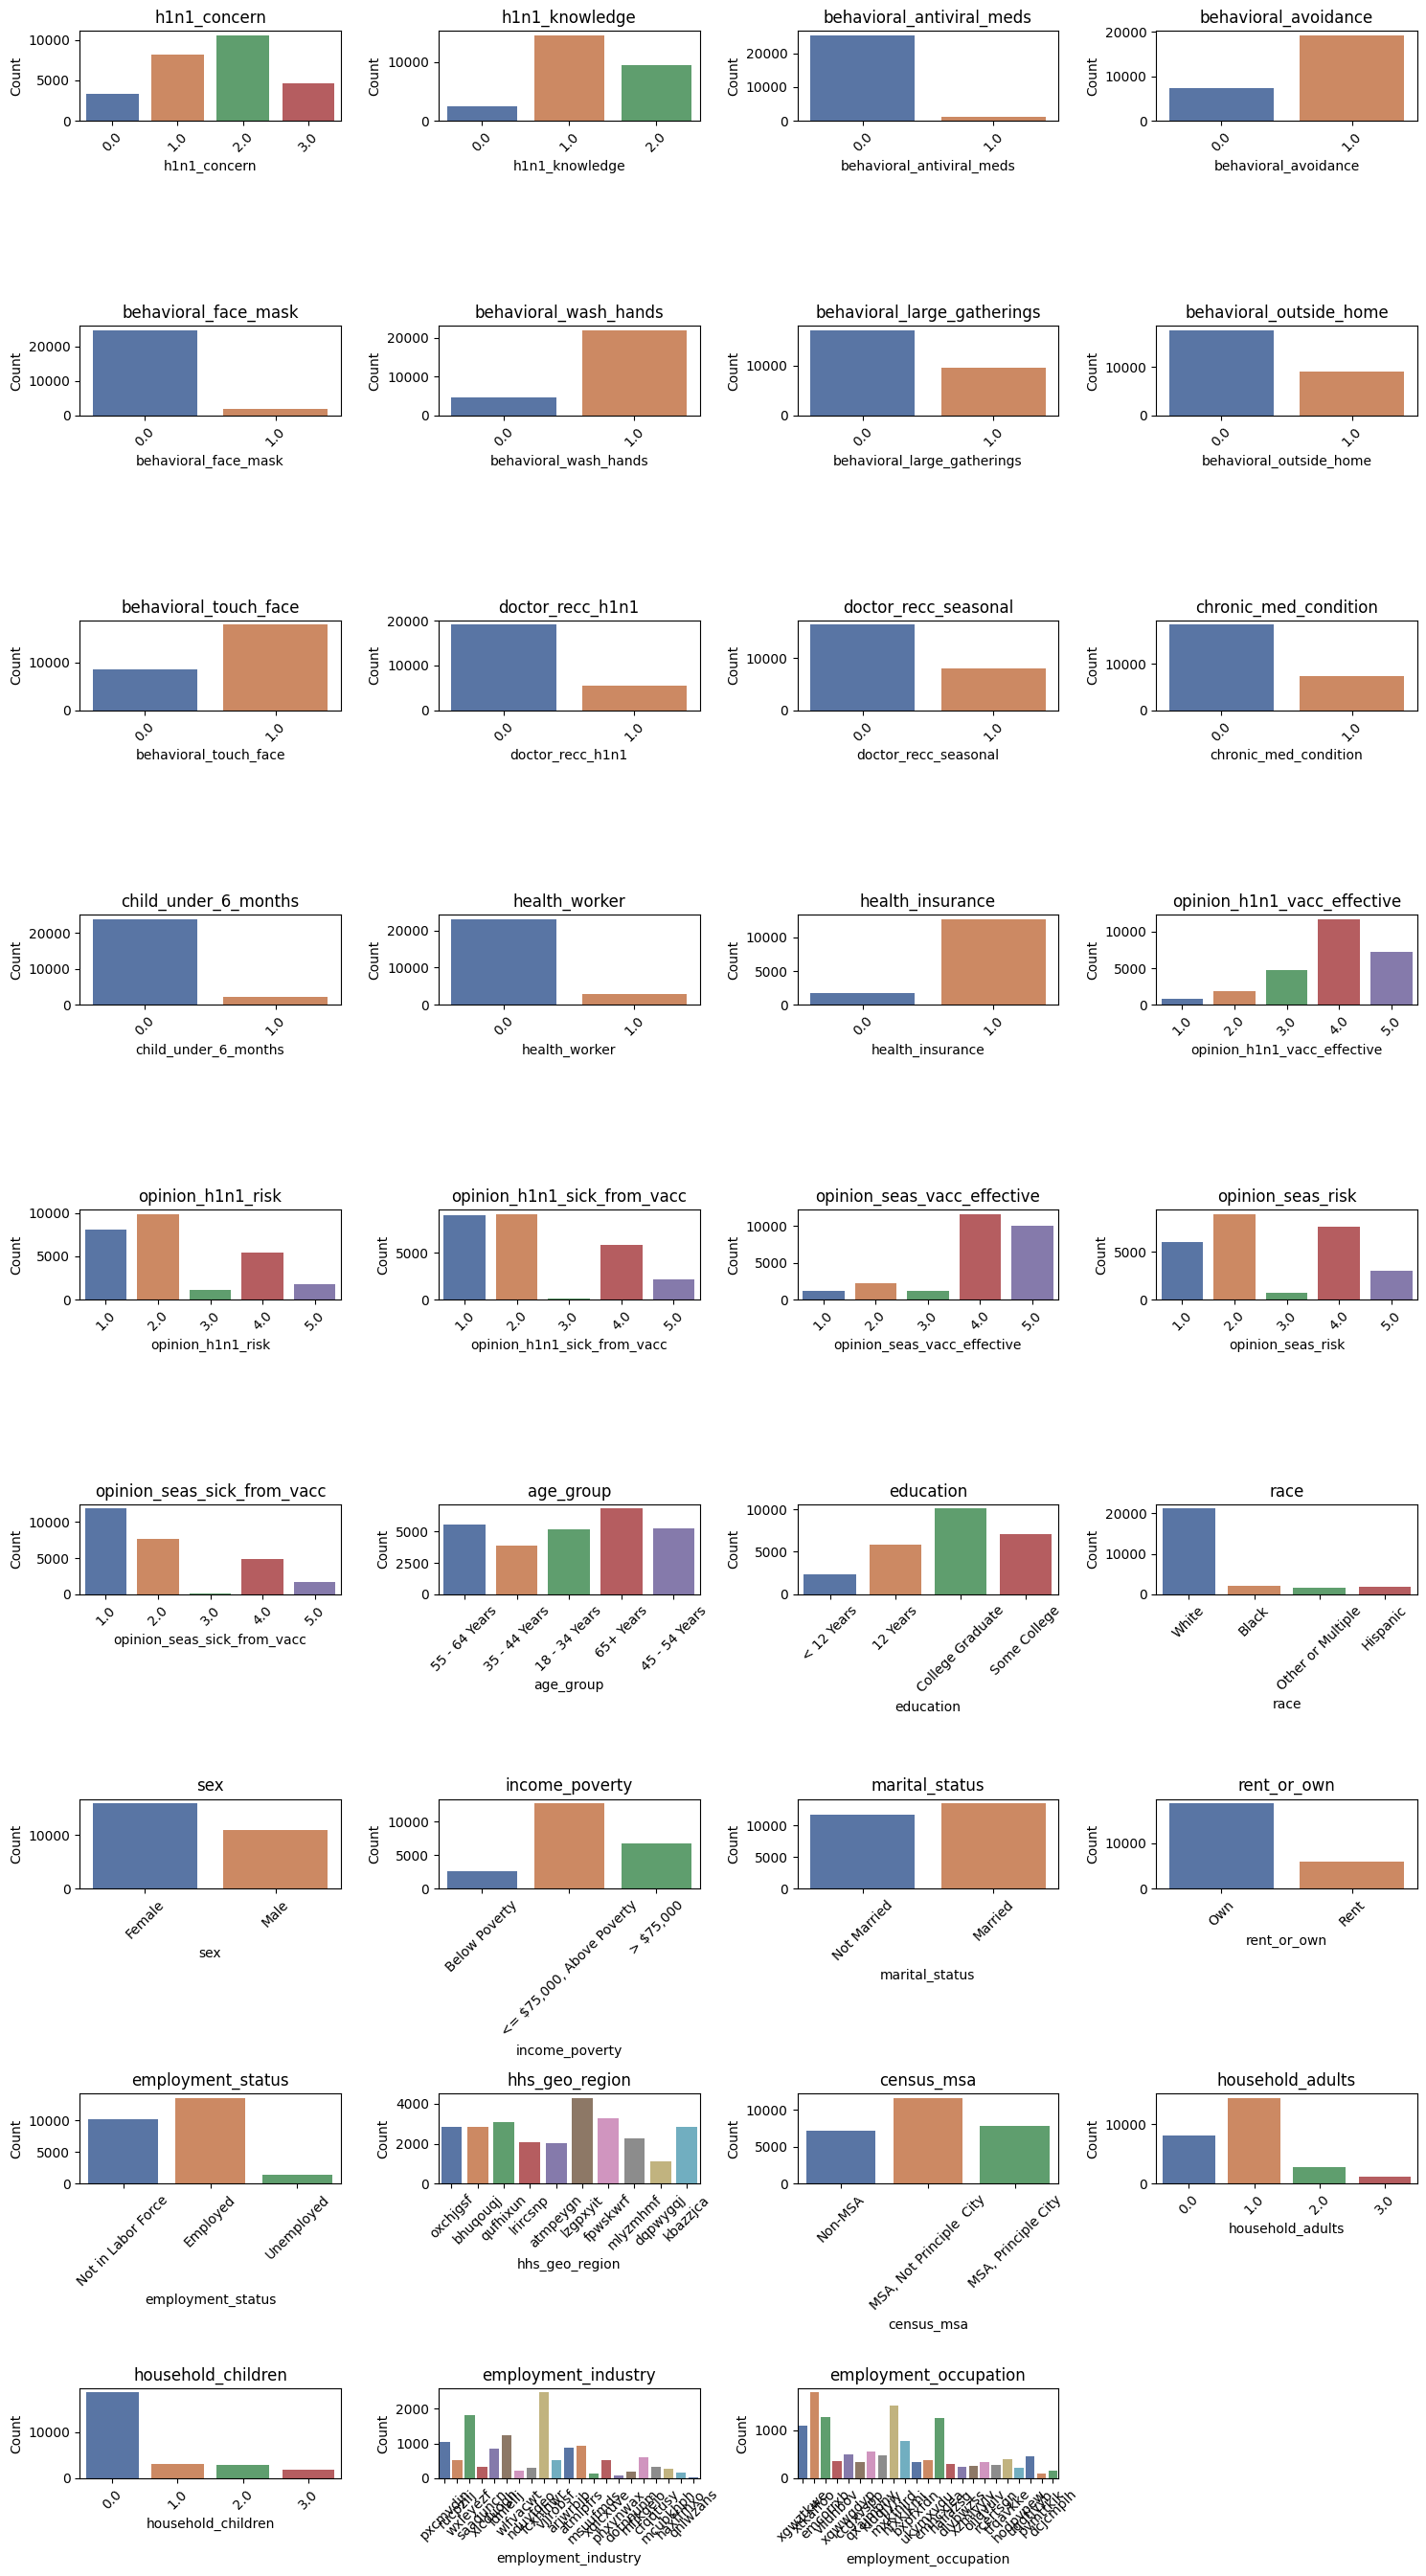

In [497]:
columns = training_set_features_df.columns[1:]

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

axes = axes.flatten()

# Generate the distribution plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=training_set_features_df, ax=axes[i], palette='deep')
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<br>

### 3.2. Training set labels

There are two target variables (both are binary variables: 0 = No; 1 = Yes):
- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.


The first column respondent_id is a unique and random identifier.

In [498]:
training_set_labels_df.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


Data types.

In [499]:
training_set_labels_df.dtypes

respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

Distribution of h1n1_vaccine.

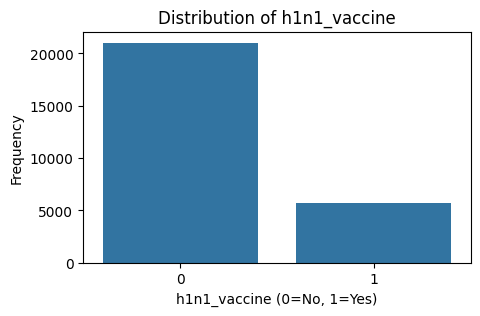

In [500]:
# Plot for the distribution of h1n1_vaccine
plt.figure(figsize=(5, 3))  
sns.countplot(x='h1n1_vaccine', data=training_set_labels_df) 
plt.title('Distribution of h1n1_vaccine')
plt.xlabel('h1n1_vaccine (0=No, 1=Yes)')
plt.ylabel('Frequency')
plt.show()

The distribution of the h1n1_vaccine variable is imbalanced. As shown in the graph, there are significantly more examples of 0 (respondents who didn't receive the H1N1 vaccine) than 1 (respondents who did receive the vaccine). This imbalance indicates that a larger proportion of respondents didn't receive the H1N1 vaccine.

Distribution of seasonal_vaccine.

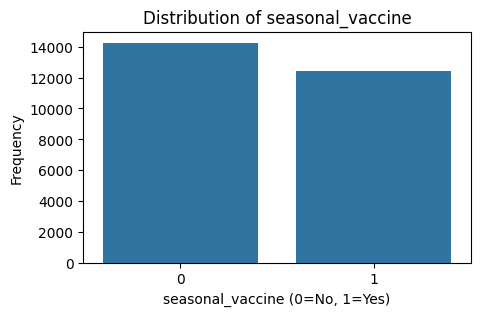

In [501]:
# Plot for the distribution of seasonal_vaccine
plt.figure(figsize=(5, 3))
sns.countplot(x='seasonal_vaccine', data=training_set_labels_df) 
plt.title('Distribution of seasonal_vaccine') 
plt.xlabel('seasonal_vaccine (0=No, 1=Yes)') 
plt.ylabel('Frequency')
plt.show()

The distribution of the seasonal_vaccine variable is more balanced. The number of people who have received the vaccine is similar to the number of those who haven't received it.

<br>

### 3.3. Encoding

The challenge is to figure out how to convert text attributes into numerical values for further processing.

Object type columns.

In [502]:
object_type_columns = training_set_features_df.select_dtypes(include='object').columns
print(object_type_columns)

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')


Unique values in the columns.

In [503]:
for column in object_type_columns:
    print(f"Unique values in the column '{column}':")
    print(training_set_features_df[column].unique()) 
    print("-" * 40) 

Unique values in the column 'age_group':
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
----------------------------------------
Unique values in the column 'education':
['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
----------------------------------------
Unique values in the column 'race':
['White' 'Black' 'Other or Multiple' 'Hispanic']
----------------------------------------
Unique values in the column 'sex':
['Female' 'Male']
----------------------------------------
Unique values in the column 'income_poverty':
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
----------------------------------------
Unique values in the column 'marital_status':
['Not Married' 'Married' nan]
----------------------------------------
Unique values in the column 'rent_or_own':
['Own' 'Rent' nan]
----------------------------------------
Unique values in the column 'employment_status':
['Not in Labor Force' 'Employed' 'Unemployed' nan]
----

Mapping.

In [504]:
for col in object_type_columns:
    unique_values = training_set_features_df[col].unique()
    
    # Create a mapping dictionary
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    mapping[np.nan] = -1 

    print(mapping) # Print the mapping dictionary

    # Apply the mapping
    training_set_features_df[col] = training_set_features_df[col].map(mapping)

    # Replace -1 values back to NaN 
    training_set_features_df[col] = training_set_features_df[col].replace(-1, np.nan)

{'55 - 64 Years': 0, '35 - 44 Years': 1, '18 - 34 Years': 2, '65+ Years': 3, '45 - 54 Years': 4, nan: -1}
{'< 12 Years': 0, '12 Years': 1, 'College Graduate': 2, 'Some College': 3, nan: -1}
{'White': 0, 'Black': 1, 'Other or Multiple': 2, 'Hispanic': 3, nan: -1}
{'Female': 0, 'Male': 1, nan: -1}
{'Below Poverty': 0, '<= $75,000, Above Poverty': 1, '> $75,000': 2, nan: -1}
{'Not Married': 0, 'Married': 1, nan: -1}
{'Own': 0, 'Rent': 1, nan: -1}
{'Not in Labor Force': 0, 'Employed': 1, 'Unemployed': 2, nan: -1}
{'oxchjgsf': 0, 'bhuqouqj': 1, 'qufhixun': 2, 'lrircsnp': 3, 'atmpeygn': 4, 'lzgpxyit': 5, 'fpwskwrf': 6, 'mlyzmhmf': 7, 'dqpwygqj': 8, 'kbazzjca': 9, nan: -1}
{'Non-MSA': 0, 'MSA, Not Principle  City': 1, 'MSA, Principle City': 2, nan: -1}
{nan: -1, 'pxcmvdjn': 1, 'rucpziij': 2, 'wxleyezf': 3, 'saaquncn': 4, 'xicduogh': 5, 'ldnlellj': 6, 'wlfvacwt': 7, 'nduyfdeo': 8, 'fcxhlnwr': 9, 'vjjrobsf': 10, 'arjwrbjb': 11, 'atmlpfrs': 12, 'msuufmds': 13, 'xqicxuve': 14, 'phxvnwax': 15, 'do

<br>

### 3.4. Handling missing values

Proportion of missing values.

In [505]:
training_set_features_df.isna().sum().sort_values(ascending=False)/len(training_set_features_df)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_children             0.009323
household_adults               0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
h1n1_concern                   0.003445


The following features have a high percentage of missing values:
| Feature                | Percentage of Missing Values |
|------------------------|------------------------------|
| employment_occupation   | 50.44%                       |
| employment_industry     | 49.91%                       |
| health_insurance        | 45.96%                       |

Due to the high percentage of missing values, these features will be removed from the dataset.

In [506]:
training_set_features_df.drop(columns=['employment_occupation', 'employment_industry', 'health_insurance'], inplace=True)
training_set_features_df.shape

(26707, 33)

What should we do with the variables that have a small percentage of missing values?